покажи Tensorboard

RNN в картинках от "Системного блока".

https://sysblok.ru/knowhow/vnimanie-vse-chto-vam-nuzhno-kak-rabotaet-attention-v-nejrosetjah/

https://sysblok.ru/knowhow/kak-rabotajut-transformery-krutejshie-nejroseti-nashih-dnej/

Внимание, ИТМО

https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%85%D0%B0%D0%BD%D0%B8%D0%B7%D0%BC_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F

# Сверточные нейронные сети

In [24]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import time
from scipy import datasets

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


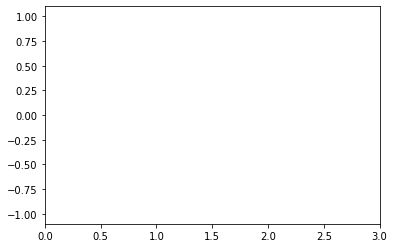

In [50]:
fig, ax = plt.subplots()
line, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line2, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line3, = ax.plot([], [], 'g--')     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 3)
ax.set_ylim(-1.1, 1.1)

x_main = np.linspace(0, 3, 300)
y_main = np.zeros(300)
y_main[120:180,] = 1

results_x = []
results_y = []

def calc_func(frame_num):
    x = np.linspace(frame_num/100, 1+frame_num/100, 100)
    y = (x - frame_num/100) * 2
    y[50:] = 2 - y[50:]
    return x, y

def animate(frame_num):
    global results_x, results_y
    if frame_num == 0:
        results_x = []
        results_y = []
    line.set_data(x_main, y_main)
    x, y = calc_func(frame_num)
    line2.set_data(x, y)
    results_x.append(frame_num/100)
    results_y.append(np.dot(y, y_main[frame_num:frame_num+100])/50)
    line3.set_data(results_x, results_y)
    return line

anim = FuncAnimation(fig, animate, frames=200, interval=10)

# animate(1)
plt.show()

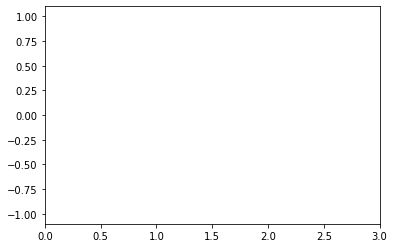

In [51]:
fig, ax = plt.subplots()
line, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line2, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line3, = ax.plot([], [], 'g--')     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 3)
ax.set_ylim(-1.1, 1.1)

results_x = []
results_y = []
x_main = np.linspace(0, 3, 300)
y_main = np.zeros(300)
y_main[120:150,] = (x_main[120:150,] - 1.2) * 3
y_main[150:180,] = (1.5 - x_main[120:150,]) * 3

def calc_func(frame_num):
    x = np.linspace(frame_num/100, 1+frame_num/100, 100)
    y = np.ones(100)
    y[0] = y[-1] = 0
    return x, y

anim = FuncAnimation(fig, animate, frames=200, interval=10)
plt.show()

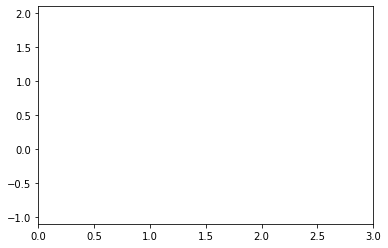

In [52]:
fig, ax = plt.subplots()
line, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line2, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line3, = ax.plot([], [], 'g--')     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 3)
ax.set_ylim(-1.1, 2.1)

x_main = np.linspace(0, 3, 300)
y_main = np.zeros(300)
y_main[120:180,] = 1

results_x = []
results_y = []

def calc_func(frame_num):
    x = np.linspace(frame_num/100, 1+frame_num/100, 100)
    y = np.ones(100)
    y[0] = y[-1] = 0
    return x, y

anim = FuncAnimation(fig, animate, frames=200, interval=10)
plt.show()

In [ ]:

fig, ax = plt.subplots()
line, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line2, = ax.plot([], [])     # A tuple unpacking to unpack the only plot
line3, = ax.plot([], [], 'g--')     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 3)
ax.set_ylim(-1.1, 1.1)

results_x = []
results_y = []
x_main = np.linspace(0, 3, 300)
y_main = np.zeros(300)
y_main[100:130,] = (x_main[100:130,] - 1) * 3
y_main[130:190,] = (1.6 - x_main[130:190,]) * 3

anim = FuncAnimation(fig, animate, frames=200, interval=10)
plt.show()

## Свёрточные сети на pyTorch

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import copy
import random
import time

In [2]:
ROOT = 'ddd'

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255

print(f'Calculated mean: {mean}')
print(f'Calculated std: {std}')

Calculated mean: 0.13066047430038452
Calculated std: 0.30810779333114624


In [3]:
train_transforms = transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[mean], std=[std])
                                      ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[mean], std=[std])
                                     ])

In [4]:
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            # download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           # download=True,
                           transform=test_transforms)

Посморим на результаты применения матриц свёртки к изображениям.

In [39]:
def plot_filter(images, pool_type, pool_size=0, filt=None):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    n_images = images.shape[0]

    if pool_type.lower() == 'max':
        pooled_images = F.max_pool2d(images, kernel_size=pool_size)
    elif pool_type.lower() in ['mean', 'avg']:
        pooled_images = F.avg_pool2d(images, kernel_size=pool_size)
    elif pool_type.lower() == 'filter':
        filt = torch.FloatTensor(filt).unsqueeze(0).unsqueeze(0).cpu()
        pooled_images = F.conv2d(images, filt)
    else:
        raise ValueError(f'pool_type must be either max or mean, got: {pool_type}')

    fig = plt.figure(figsize=(20, 5))

    for i in range(n_images):

        ax = fig.add_subplot(2, n_images, i+1)
        ax.imshow(images[i].squeeze(0), cmap='bone')
        ax.set_title('Original')
        ax.axis('off')

        image = pooled_images[i].squeeze(0)

        ax = fig.add_subplot(2, n_images, n_images+i+1)
        ax.imshow(image, cmap='bone')
        ax.set_title('Subsampled')
        ax.axis('off')        

In [35]:
N_IMAGES = 5

images = [image for image, label in [test_data[i] for i in range(N_IMAGES)]]

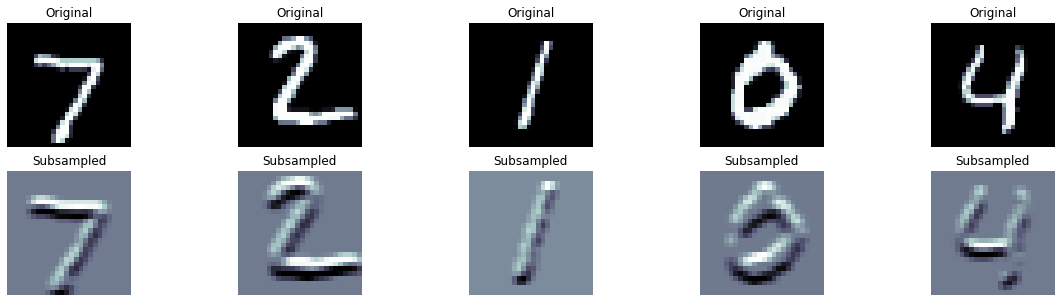

In [40]:
# Горизонтальный фильтр, переход от темного к светлому.
horizontal_filter = [[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]]
plot_filter(images, "filter", filt=horizontal_filter)

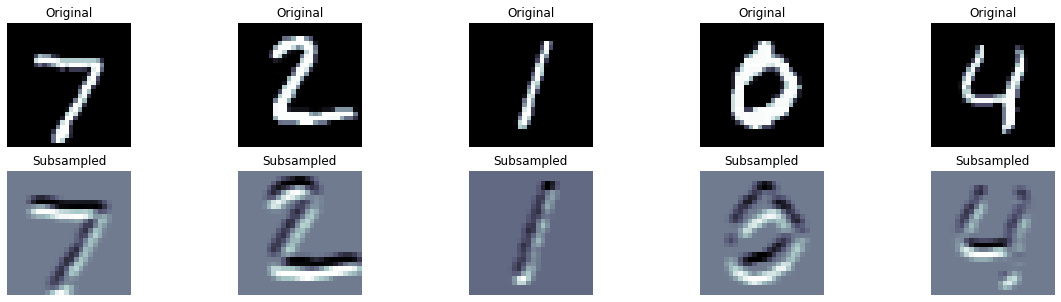

In [41]:
# Горизонтальный фильтр, переход от светлого к тёмному.
horizontal_filter = [[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]]

plot_filter(images, "filter", filt=horizontal_filter)

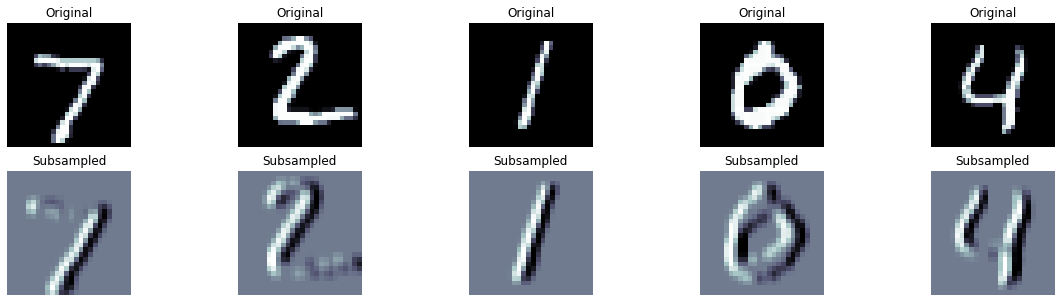

In [42]:
# Вертикальный фильтр, переход от темного к светлому.
vertical_filter = [[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]

plot_filter(images, "filter", filt=vertical_filter)

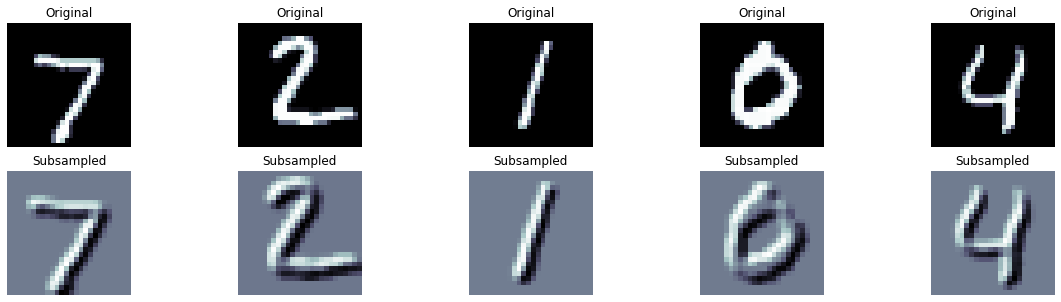

In [43]:
# Диагональный фильтр, переход от темного к светлому.
diagonal_filter = [[-2, -1, 0],
                   [-1,  0, 1],
                   [ 0,  1, 2]]

plot_filter(images, "filter", filt=diagonal_filter)

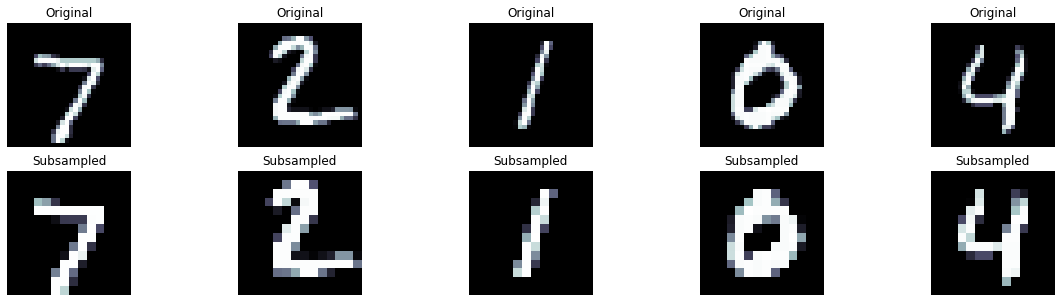

In [44]:
# MaxPooling
plot_filter(images, "max", pool_size=2)

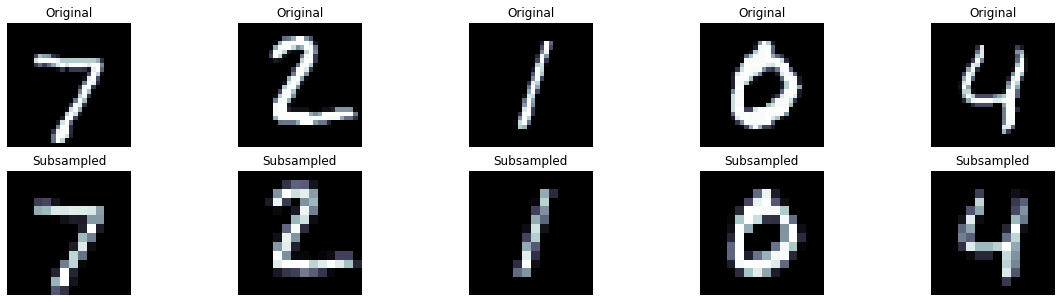

In [45]:
# AvgPooling
plot_filter(images, "avg", pool_size=2)

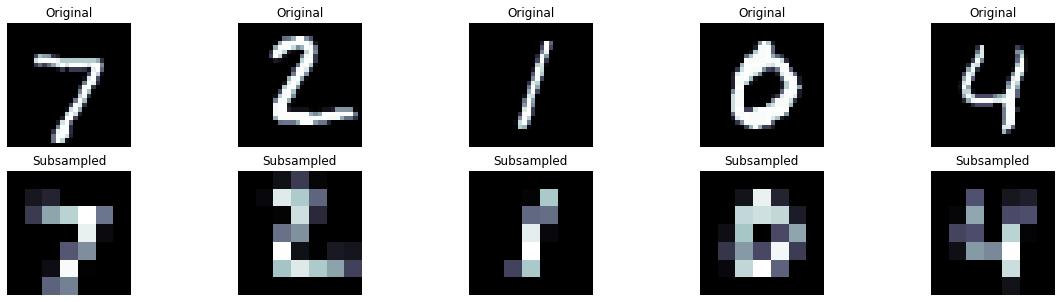

In [46]:
# Пулингбольшего размера.
plot_filter(images, "avg", pool_size=4)

Теперь посморим на то, как будет учиться  нейронная сеть.

In [5]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

In [6]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

In [7]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


In [8]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

In [9]:
class LeNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1,
                               out_channels=6,
                               kernel_size=5)

        self.conv2 = nn.Conv2d(in_channels=6,
                               out_channels=16,
                               kernel_size=5)

        self.fc_1 = nn.Linear(16 * 4 * 4, 120)
        self.fc_2 = nn.Linear(120, 84)
        self.fc_3 = nn.Linear(84, output_dim)

    def forward(self, x):
        # x = [batch size, 1, 28, 28]
        x = self.conv1(x)
        # x = [batch size, 6, 24, 24]
        x = F.max_pool2d(x, kernel_size=2)
        # x = [batch size, 6, 12, 12]
        x = F.relu(x)
        x = self.conv2(x)
        # x = [batch size, 16, 8, 8]
        x = F.max_pool2d(x, kernel_size=2)
        # x = [batch size, 16, 4, 4]
        x = F.relu(x)
        x = x.view(x.shape[0], -1)
        # x = [batch size, 16*4*4 = 256]
        h = x
        x = self.fc_1(x)
        # x = [batch size, 120]
        x = F.relu(x)
        x = self.fc_2(x)
        # x = batch size, 84]
        x = F.relu(x)
        x = self.fc_3(x)
        # x = [batch size, output dim]
        return x#, h

In [10]:
OUTPUT_DIM = 10

model = LeNet(OUTPUT_DIM)

In [11]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc_1): Linear(in_features=256, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = model.to(device)
criterion = criterion.to(device)

In [13]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [14]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [15]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [16]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [18]:
EPOCHS = 20

all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 15s
	Train Loss: 0.192 | Train Acc: 94.08%
	 Val. Loss: 0.090 |  Val. Acc: 97.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 15s
	Train Loss: 0.104 | Train Acc: 96.74%
	 Val. Loss: 0.052 |  Val. Acc: 98.30%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.083 | Train Acc: 97.40%
	 Val. Loss: 0.051 |  Val. Acc: 98.47%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.069 | Train Acc: 97.82%
	 Val. Loss: 0.039 |  Val. Acc: 98.77%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.065 | Train Acc: 98.03%
	 Val. Loss: 0.042 |  Val. Acc: 98.67%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 19s
	Train Loss: 0.059 | Train Acc: 98.17%
	 Val. Loss: 0.030 |  Val. Acc: 98.82%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 0.052 | Train Acc: 98.35%
	 Val. Loss: 0.037 |  Val. Acc: 99.03%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.050 | Train Acc: 98.39%
	 Val. Loss: 0.033 |  Val. Acc: 98.95%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.048 | Train Acc: 98.50%
	 Val. Loss: 0.029 |  Val. Acc: 98.87%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 17s
	Train Loss: 0.044 | Train Acc: 98.67%
	 Val. Loss: 0.028 |  Val. Acc: 99.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 16s
	Train Loss: 0.041 | Train Acc: 98.72%
	 Val. Loss: 0.030 |  Val. Acc: 98.92%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.78%
	 Val. Loss: 0.028 |  Val. Acc: 98.95%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.75%
	 Val. Loss: 0.023 |  Val. Acc: 99.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 16s
	Train Loss: 0.037 | Train Acc: 98.90%
	 Val. Loss: 0.021 |  Val. Acc: 99.31%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 16s
	Train Loss: 0.036 | Train Acc: 98.88%
	 Val. Loss: 0.020 |  Val. Acc: 99.40%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 17s
	Train Loss: 0.037 | Train Acc: 98.82%
	 Val. Loss: 0.026 |  Val. Acc: 99.29%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 17s
	Train Loss: 0.033 | Train Acc: 98.94%
	 Val. Loss: 0.024 |  Val. Acc: 99.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 18s
	Train Loss: 0.032 | Train Acc: 99.00%
	 Val. Loss: 0.021 |  Val. Acc: 99.25%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 17s
	Train Loss: 0.032 | Train Acc: 98.96%
	 Val. Loss: 0.020 |  Val. Acc: 99.35%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 18s
	Train Loss: 0.030 | Train Acc: 99.04%
	 Val. Loss: 0.022 |  Val. Acc: 99.29%


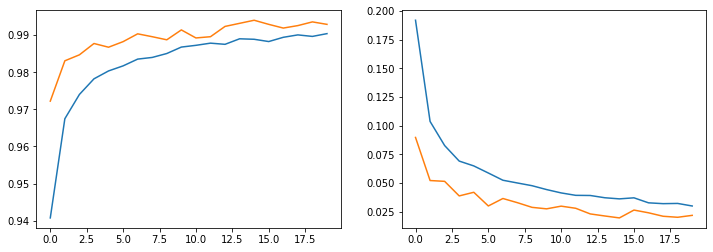

In [19]:
figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12);
sns.lineplot(all_train_acc, ax=axis[0])
sns.lineplot(all_valid_acc, ax=axis[0])
sns.lineplot(all_train_loss, ax=axis[1])
sns.lineplot(all_valid_loss, ax=axis[1]);

Теперь то же самое, но без "ручного управления" процессом вывода значений.

In [20]:
class LeNet2(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=6,
                      kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(in_channels=6,
                      out_channels=16,
                      kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 4 * 4, 120), 
            nn.ReLU(),
            nn.Linear(120, 84), 
            nn.ReLU(),
            nn.Linear(84, output_dim),
        
            # nn.Linear(16 * 4 * 4, 256), 
            # nn.ReLU(),
            # nn.Linear(256, output_dim),
        )

    def forward(self, x):
        return self.layers(x) 

In [21]:
model = LeNet2(OUTPUT_DIM)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = model.to(device)
criterion = criterion.to(device)

In [47]:
model

LeNet2(
  (layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [22]:
EPOCHS = 20

all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 18s
	Train Loss: 0.396 | Train Acc: 87.41%
	 Val. Loss: 0.083 |  Val. Acc: 97.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.127 | Train Acc: 96.05%
	 Val. Loss: 0.063 |  Val. Acc: 97.97%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 18s
	Train Loss: 0.096 | Train Acc: 96.96%
	 Val. Loss: 0.057 |  Val. Acc: 98.13%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.083 | Train Acc: 97.38%
	 Val. Loss: 0.043 |  Val. Acc: 98.73%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.071 | Train Acc: 97.82%
	 Val. Loss: 0.047 |  Val. Acc: 98.45%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.063 | Train Acc: 97.95%
	 Val. Loss: 0.044 |  Val. Acc: 98.82%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 0.059 | Train Acc: 98.15%
	 Val. Loss: 0.046 |  Val. Acc: 98.71%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.055 | Train Acc: 98.30%
	 Val. Loss: 0.039 |  Val. Acc: 98.70%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.051 | Train Acc: 98.40%
	 Val. Loss: 0.038 |  Val. Acc: 98.81%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 18s
	Train Loss: 0.049 | Train Acc: 98.47%
	 Val. Loss: 0.042 |  Val. Acc: 98.68%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 17s
	Train Loss: 0.046 | Train Acc: 98.51%
	 Val. Loss: 0.036 |  Val. Acc: 98.85%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 19s
	Train Loss: 0.042 | Train Acc: 98.64%
	 Val. Loss: 0.038 |  Val. Acc: 98.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.040 | Train Acc: 98.73%
	 Val. Loss: 0.028 |  Val. Acc: 99.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 17s
	Train Loss: 0.041 | Train Acc: 98.72%
	 Val. Loss: 0.031 |  Val. Acc: 99.00%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 17s
	Train Loss: 0.037 | Train Acc: 98.83%
	 Val. Loss: 0.036 |  Val. Acc: 99.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.76%
	 Val. Loss: 0.027 |  Val. Acc: 99.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 18s
	Train Loss: 0.037 | Train Acc: 98.79%
	 Val. Loss: 0.032 |  Val. Acc: 98.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 17s
	Train Loss: 0.036 | Train Acc: 98.84%
	 Val. Loss: 0.028 |  Val. Acc: 99.14%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 17s
	Train Loss: 0.032 | Train Acc: 98.99%
	 Val. Loss: 0.035 |  Val. Acc: 99.05%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 19s
	Train Loss: 0.033 | Train Acc: 98.95%
	 Val. Loss: 0.029 |  Val. Acc: 99.04%


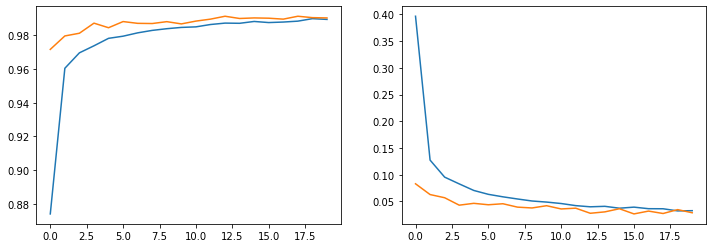

In [23]:
figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12);
sns.lineplot(all_train_acc, ax=axis[0])
sns.lineplot(all_valid_acc, ax=axis[0])
sns.lineplot(all_train_loss, ax=axis[1])
sns.lineplot(all_valid_loss, ax=axis[1]);

Сменим оптимизатор.

In [25]:
model = LeNet2(OUTPUT_DIM)
optimizer = optim.SGD(model.parameters())
criterion = nn.CrossEntropyLoss()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = model.to(device)
criterion = criterion.to(device)

In [26]:
EPOCHS = 20

all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 15s
	Train Loss: 2.296 | Train Acc: 14.64%
	 Val. Loss: 2.285 |  Val. Acc: 18.60%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 16s
	Train Loss: 2.279 | Train Acc: 20.21%
	 Val. Loss: 2.258 |  Val. Acc: 23.08%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 2.245 | Train Acc: 26.20%
	 Val. Loss: 2.191 |  Val. Acc: 37.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 2.126 | Train Acc: 38.46%
	 Val. Loss: 1.897 |  Val. Acc: 54.96%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 1.658 | Train Acc: 54.33%
	 Val. Loss: 1.091 |  Val. Acc: 75.60%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 19s
	Train Loss: 1.154 | Train Acc: 64.86%
	 Val. Loss: 0.704 |  Val. Acc: 81.55%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.933 | Train Acc: 71.18%
	 Val. Loss: 0.558 |  Val. Acc: 84.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.787 | Train Acc: 75.71%
	 Val. Loss: 0.468 |  Val. Acc: 87.23%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.680 | Train Acc: 79.55%
	 Val. Loss: 0.396 |  Val. Acc: 89.65%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 20s
	Train Loss: 0.581 | Train Acc: 82.54%
	 Val. Loss: 0.345 |  Val. Acc: 90.56%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 18s
	Train Loss: 0.498 | Train Acc: 85.15%
	 Val. Loss: 0.324 |  Val. Acc: 91.00%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 19s
	Train Loss: 0.442 | Train Acc: 87.14%
	 Val. Loss: 0.283 |  Val. Acc: 92.74%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 18s
	Train Loss: 0.390 | Train Acc: 88.50%
	 Val. Loss: 0.265 |  Val. Acc: 92.82%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 18s
	Train Loss: 0.354 | Train Acc: 89.54%
	 Val. Loss: 0.237 |  Val. Acc: 93.77%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.328 | Train Acc: 90.33%
	 Val. Loss: 0.227 |  Val. Acc: 93.72%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 17s
	Train Loss: 0.301 | Train Acc: 91.20%
	 Val. Loss: 0.209 |  Val. Acc: 94.28%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 18s
	Train Loss: 0.282 | Train Acc: 91.71%
	 Val. Loss: 0.189 |  Val. Acc: 95.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 18s
	Train Loss: 0.264 | Train Acc: 92.27%
	 Val. Loss: 0.181 |  Val. Acc: 95.21%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 16s
	Train Loss: 0.250 | Train Acc: 92.53%
	 Val. Loss: 0.172 |  Val. Acc: 95.08%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 18s
	Train Loss: 0.237 | Train Acc: 92.91%
	 Val. Loss: 0.161 |  Val. Acc: 95.50%


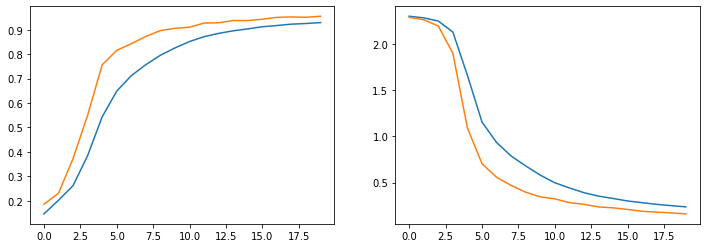

In [27]:
figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12);
sns.lineplot(all_train_acc, ax=axis[0])
sns.lineplot(all_valid_acc, ax=axis[0])
sns.lineplot(all_train_loss, ax=axis[1])
sns.lineplot(all_valid_loss, ax=axis[1]);

In [48]:
all_pred = []
all_true = []
model.eval()

with torch.no_grad():

    for (x, y) in tqdm(test_iterator, desc="Evaluating", leave=False):

        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        top_pred = y_pred.argmax(1, keepdim=True)
        all_pred.extend(top_pred)
        all_true.extend(y)
        
confusion_matrix(all_true, all_pred)


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

array([[ 963,    0,    2,    0,    3,    3,    3,    1,    1,    4],
       [   0, 1118,    4,    1,    0,    1,    3,    2,    6,    0],
       [   8,    1,  985,   14,    2,    1,    4,   12,    4,    1],
       [   0,    2,    5,  952,    0,   31,    0,    8,    8,    4],
       [   1,    0,    2,    0,  953,    0,    3,    2,    0,   21],
       [   4,    0,    1,   11,    2,  861,    3,    1,    7,    2],
       [   7,    5,    1,    0,   15,   10,  918,    0,    2,    0],
       [   0,    1,   17,    4,    0,    0,    0,  986,    2,   18],
       [  19,    2,    3,    9,    9,   11,    9,   10,  897,    5],
       [   9,    8,    0,    7,   28,   11,    1,    4,    2,  939]])

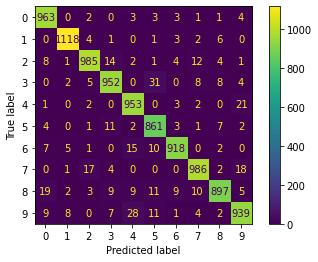

In [56]:
ConfusionMatrixDisplay(confusion_matrix(all_true, all_pred)).plot();

In [57]:
precision_recall_fscore_support(all_true, all_pred)

(array([0.95252226, 0.98328936, 0.96568627, 0.95390782, 0.9416996 ,
        0.92680301, 0.97245763, 0.96101365, 0.96555436, 0.94466801]),
 array([0.98265306, 0.98502203, 0.95445736, 0.94257426, 0.97046843,
        0.96524664, 0.95824635, 0.95914397, 0.92094456, 0.93062438]),
 array([0.96735309, 0.98415493, 0.96003899, 0.94820717, 0.9558676 ,
        0.94563427, 0.96529968, 0.9600779 , 0.94272202, 0.93759361]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [58]:
class LeNet3(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1,
                      out_channels=6,
                      kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Conv2d(in_channels=6,
                      out_channels=16,
                      kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Flatten(),
            nn.Linear(16 * 4 * 4, 120), 
            nn.ReLU(),
            nn.Linear(120, 84), 
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(84, output_dim),
        
            # nn.Linear(16 * 4 * 4, 256), 
            # nn.ReLU(),
            # nn.Linear(256, output_dim),
        )

    def forward(self, x):
        return self.layers(x) 

In [61]:
model = LeNet3(OUTPUT_DIM)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = model.to(device)
criterion = criterion.to(device)

In [62]:
model

LeNet3(
  (layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=256, out_features=120, bias=True)
    (10): ReLU()
    (11): Linear(in_features=120, out_features=84, bias=True)
    (12): Dropout(p=0.1, inplace=False)
    (13): ReLU()
    (14): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [63]:
EPOCHS = 20

all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.481 | Train Acc: 84.43%
	 Val. Loss: 0.104 |  Val. Acc: 96.80%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 16s
	Train Loss: 0.169 | Train Acc: 94.79%
	 Val. Loss: 0.062 |  Val. Acc: 98.17%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.129 | Train Acc: 95.93%
	 Val. Loss: 0.048 |  Val. Acc: 98.50%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.106 | Train Acc: 96.66%
	 Val. Loss: 0.042 |  Val. Acc: 98.65%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.095 | Train Acc: 97.05%
	 Val. Loss: 0.034 |  Val. Acc: 98.91%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.087 | Train Acc: 97.32%
	 Val. Loss: 0.036 |  Val. Acc: 98.80%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.084 | Train Acc: 97.44%
	 Val. Loss: 0.046 |  Val. Acc: 98.48%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.078 | Train Acc: 97.62%
	 Val. Loss: 0.028 |  Val. Acc: 99.18%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.071 | Train Acc: 97.82%
	 Val. Loss: 0.031 |  Val. Acc: 99.04%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 17s
	Train Loss: 0.068 | Train Acc: 97.87%
	 Val. Loss: 0.032 |  Val. Acc: 98.95%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 17s
	Train Loss: 0.065 | Train Acc: 97.99%
	 Val. Loss: 0.030 |  Val. Acc: 99.10%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 17s
	Train Loss: 0.062 | Train Acc: 98.08%
	 Val. Loss: 0.028 |  Val. Acc: 99.12%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.059 | Train Acc: 98.13%
	 Val. Loss: 0.025 |  Val. Acc: 99.20%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 17s
	Train Loss: 0.058 | Train Acc: 98.21%
	 Val. Loss: 0.026 |  Val. Acc: 99.22%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 17s
	Train Loss: 0.059 | Train Acc: 98.18%
	 Val. Loss: 0.025 |  Val. Acc: 99.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 17s
	Train Loss: 0.056 | Train Acc: 98.26%
	 Val. Loss: 0.024 |  Val. Acc: 99.34%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 17s
	Train Loss: 0.054 | Train Acc: 98.33%
	 Val. Loss: 0.028 |  Val. Acc: 99.02%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 16s
	Train Loss: 0.054 | Train Acc: 98.32%
	 Val. Loss: 0.028 |  Val. Acc: 99.05%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 16s
	Train Loss: 0.055 | Train Acc: 98.36%
	 Val. Loss: 0.025 |  Val. Acc: 99.19%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 16s
	Train Loss: 0.050 | Train Acc: 98.42%
	 Val. Loss: 0.023 |  Val. Acc: 99.37%


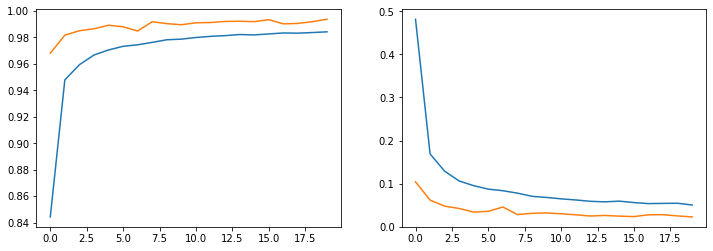

In [64]:
figure, axis = plt.subplots(1, 2)
figure.set_figwidth(12);
sns.lineplot(all_train_acc, ax=axis[0])
sns.lineplot(all_valid_acc, ax=axis[0])
sns.lineplot(all_train_loss, ax=axis[1])
sns.lineplot(all_valid_loss, ax=axis[1]);

In [65]:
all_pred = []
all_true = []
model.eval()

with torch.no_grad():

    for (x, y) in tqdm(test_iterator, desc="Evaluating", leave=False):

        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        top_pred = y_pred.argmax(1, keepdim=True)
        all_pred.extend(top_pred)
        all_true.extend(y)
        
confusion_matrix(all_true, all_pred)


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

array([[ 975,    0,    0,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1130,    1,    0,    0,    0,    0,    3,    0,    1],
       [   1,    1, 1020,    0,    0,    0,    0,    9,    1,    0],
       [   0,    0,    1, 1002,    0,    2,    0,    3,    1,    1],
       [   0,    0,    0,    0,  971,    0,    4,    0,    0,    7],
       [   1,    0,    0,    7,    0,  882,    1,    1,    0,    0],
       [   5,    0,    0,    0,    0,    1,  951,    0,    1,    0],
       [   0,    1,    1,    0,    1,    0,    0, 1025,    0,    0],
       [   1,    0,    1,    1,    0,    3,    0,    1,  966,    1],
       [   0,    0,    0,    1,    4,    2,    0,    4,    0,  998]])

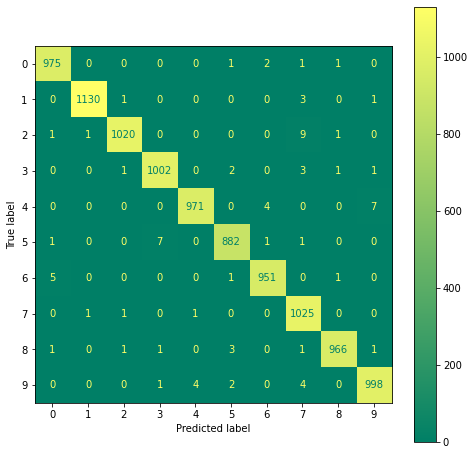

In [73]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(8)
cm = confusion_matrix(all_true, all_pred)
cm = ConfusionMatrixDisplay(cm, display_labels=range(10))
cm.plot(values_format='d', cmap='summer', ax=ax);

In [79]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace=0.5)

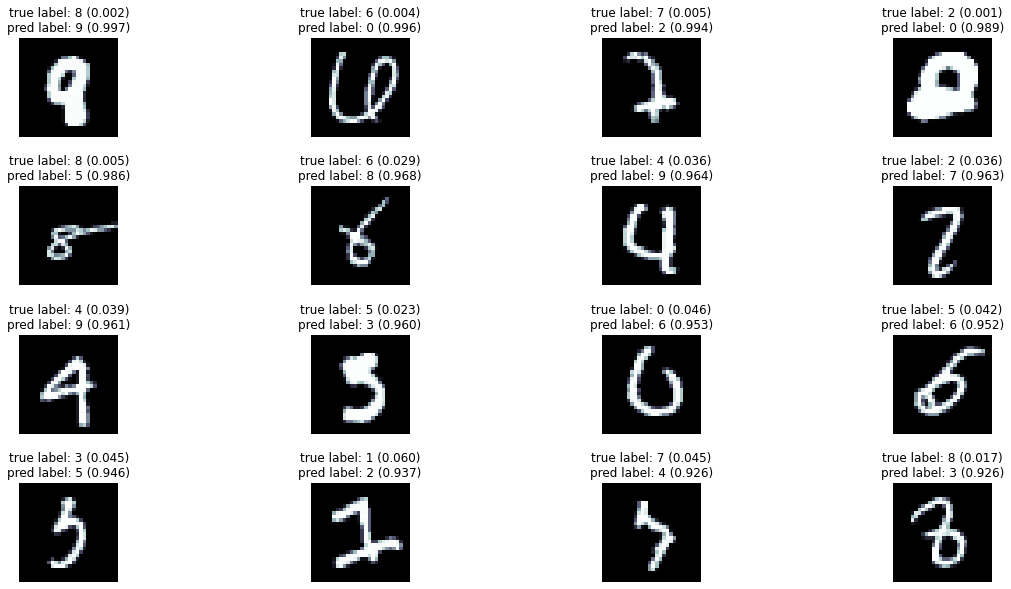

In [82]:
N_IMAGES = 16

images, labels, probs = get_predictions(model, test_iterator, device)
pred_labels = torch.argmax(probs, 1)
corrects = torch.eq(labels, pred_labels)

incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,
                        key=lambda x: torch.max(x[2], dim=0).values)

plot_most_incorrect(incorrect_examples, N_IMAGES)

# Рекуррентные сети

![](https://sysblok.ru/wp-content/uploads/2020/06/image6-7.png)

![](https://sysblok.ru/wp-content/uploads/2020/06/image12-1536x576.png)


### LSTM


![](https://sysblok.ru/wp-content/uploads/2020/06/image10-4-1536x578.png)


### [Скопирайчено отсюда](https://sysblok.ru/knowhow/mama-myla-lstm-kak-ustroeny-rekurrentnye-nejroseti-s-dolgoj-kratkosrochnoj-pamjatju/)

In [141]:
train_data3  = []
for i in range(len(train_data)):
    # y = np.zeros((10))
    # y[train_data[i][1]] = 1
    train_data3.append((torch.tensor(np.array(train_data[i][0], dtype=np.float32).reshape(-1)), 
                        torch.tensor(np.float32(train_data[i][1]))
                       ))
    
valid_data3  = []
for i in range(len(valid_data)):
    # y = np.zeros((10))
    # y[valid_data[i][1]] = 1
    valid_data3.append((torch.tensor(np.array(valid_data[i][0], dtype=np.float32).reshape(-1)),
                        torch.tensor(np.float32(train_data[i][1]))
                       ))
    
test_data3  = []
for i in range(len(test_data)):
    # y = np.zeros((10))
    # y[test_data[i][1]] = 1
    test_data3.append((torch.tensor(np.array(test_data[i][0], dtype=np.float32).reshape(-1)), 
                       torch.tensor(np.float32(train_data[i][1]))
                      ))

In [142]:
BATCH_SIZE = 64

train_iterator3 = data.DataLoader(train_data3,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator3 = data.DataLoader(valid_data3,
                                 batch_size=BATCH_SIZE)

test_iterator3 = data.DataLoader(test_data3,
                                batch_size=BATCH_SIZE)

In [210]:
class RNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_dim, 
                             hidden_size=2 * input_dim, 
                             num_layers=1, 
                             bidirectional=True
                            )
        self.lin1 = nn.Linear(2 * input_dim, output_dim)

    def forward(self, x):
        h_1 = self.lstm1(x)
        print(h_1)
        res = self.lin1(h_1[0])
        return res

In [211]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, OUTPUT_DIM)
optimizer = optim.Adam(model.parameters())
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = model.to(device)
criterion = criterion.to(device)

In [212]:
model

RNN(
  (lstm1): LSTM(784, 1568, bidirectional=True)
  (lin1): Linear(in_features=1568, out_features=1, bias=True)
)

In [213]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()

        y_pred = model(x)
        
        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [214]:
EPOCHS = 20

all_train_acc =  []
all_valid_acc = []
all_train_loss =  []
all_valid_loss = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator3, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator3, criterion, device)
    all_train_acc.append(train_acc)
    all_valid_acc.append(valid_acc)
    all_train_loss.append(train_loss)
    all_valid_loss.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

(tensor([[ 0.0316,  0.0671,  0.1040,  ..., -0.1645,  0.2216, -0.1052],
        [-0.0032, -0.0829,  0.0280,  ..., -0.1776,  0.2003, -0.0893],
        [-0.0070, -0.1112,  0.0189,  ..., -0.0685,  0.0631,  0.0169],
        ...,
        [ 0.1334,  0.0508,  0.1577,  ..., -0.0105,  0.1691, -0.0010],
        [ 0.0133, -0.0462,  0.1210,  ...,  0.0106,  0.2779, -0.1485],
        [-0.0819, -0.1941,  0.1251,  ..., -0.0119,  0.2540, -0.0021]],
       grad_fn=<SqueezeBackward1>), (tensor([[-0.0819, -0.1941,  0.1251,  ..., -0.1802, -0.1037, -0.0673],
        [ 0.2649,  0.0068, -0.1678,  ..., -0.1645,  0.2216, -0.1052]],
       grad_fn=<SqueezeBackward1>), tensor([[-0.1562, -0.4353,  0.3375,  ..., -0.4133, -0.2299, -0.1220],
        [ 0.5991,  0.0115, -0.3413,  ..., -0.3902,  0.4332, -0.2159]],
       grad_fn=<SqueezeBackward1>)))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x3136 and 1568x1)